In [4]:
import numpy as np
import matplotlib.pyplot as plt

N, M = 6, 9 #N is the number of bonds, M is the number of periods
K = 100 # K is the principal 
T = np.array([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2]) # This is the different time periods 
L_3M, L_6M = 0.01472717, 0.01893706 #This is the LIBOR fixing for 3 & 6 months 
pi = np.array([102.33689177,104.80430234,105.1615306,105.6581905,104.02899992,101.82604116]) # This is the bond prices
pi_new = np.array([101.37241234,102.33995192,102.66601781,104.16399942,102.75471174,98.79916103]) #This is the new bond prices
p_0_2M_new, p_0_5M_new = 0.99699147, 0.99088748
pi_swap_new = -0.1161878302683732

In [5]:
# Problem a)
C = np.zeros([N,M])
C[0,:] = [0.04*K*0.25,0.04*K*0.25,0.04*K*0.25,0.04*K*0.25,0.04*K*0.25+K,0,0,0,0]
C[1,:] = [0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5+K,0,0,0,0]
C[2,:] = [0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5,0,0.05*K*0.5+K,0,0]
C[3,:] = [0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25,0.06*K*0.25+K,0,0]
C[4,:] = [0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25,0.05*K*0.25+K]
C[5,:] = [0.03*K*1,0,0,0,0.03*K*1,0,0,0,0.03*K*1+K]
print(C)


[[  1.     1.     1.     1.   101.     0.     0.     0.     0.  ]
 [  2.5    0.     2.5    0.   102.5    0.     0.     0.     0.  ]
 [  2.5    0.     2.5    0.     2.5    0.   102.5    0.     0.  ]
 [  1.5    1.5    1.5    1.5    1.5    1.5  101.5    0.     0.  ]
 [  1.25   1.25   1.25   1.25   1.25   1.25   1.25   1.25 101.25]
 [  3.     0.     0.     0.     3.     0.     0.     0.   103.  ]]


In [ ]:
M

In [3]:
# Problem b)
# Initialize arrays for bond prices (p) and spot rates (r) for M periods
p, r = np.ones([M]), np.zeros([M])  # p is an array of ones, r is an array of zeros
# Set the bond prices for the first two periods based on LIBOR rates (3M and 6M)
# Using simple discounting formula: 1 / (1 + rate * time)
p[1], p[2] = 1/(1+L_3M*T[1]), 1/(1+L_6M*T[2])
# Calculate the residual (y) by subtracting the known bond price components from the vector pi, which represents bond prices
# C[:,0], C[:,1], and C[:,2] are the first three columns of matrix C, which represents coefficients for the first three periods
y = pi - p[0]*C[:,0] - p[1]*C[:,1] - p[2]*C[:,2]
# Extract the remaining columns of the matrix C (from column 3 onward)
# These correspond to the coefficients for periods 4 to M (indexed from 0)
x = C[:,3:]
# Solve the linear system x * p[3:M] = y to find bond prices for periods 3 to M
# This is a system of linear equations where x is the coefficient matrix and y is the residual
p[3:M] = np.linalg.solve(x, y)
# Loop through each period from 1 to M (excluding 0), and calculate the spot rates
# The spot rate r[i] is computed as -log(p[i]) / T[i], based on the relationship between bond price and spot rate: p[i] = e^(-r[i] * T[i])
for i in range(1, M):
    r[i] = -np.log(p[i])/T[i]  # Calculate spot rate for each maturity using bond prices


In [4]:
# Problem c)
# Initialize an array to hold the 3-month forward rates
f_3M = np.zeros([M])  # f_3M will store the forward rates for M periods

# The forward rate for the first period is just the spot rate for that period
f_3M[0] = r[0]  # Set the first forward rate equal to the first spot rate

# Loop through each period from 1 to M, calculating the forward rate for each
for i in range(1, M):
    # Forward rate calculation using the difference in log bond prices
    # (T[i] - T[i-1]) represents the time difference between the periods
    # This formula gives the continuously compounded forward rate between periods i-1 and i
    f_3M[i] = -(np.log(p[i]) - np.log(p[i-1])) / (T[i] - T[i-1])


In [9]:
# Problem d)
# Calculate the present value of the floating leg
# K is the notional amount, and p[0] is the price of a zero-coupon bond with the earliest maturity
pi_float = K * p[0]  # This gives the present value of the floating cash flows
print(f"2d - The floating note trrade at par: {pi_float}")


2d - The floating note trrade at par: 100.0


In [6]:
# Problem e)
# Calculate the par swap rate (R) using the present values of bond prices for certain maturities
# The numerator (1 - p[8]) represents the value of the floating leg after 8 periods
# The denominator represents the present value of the fixed leg with payments occurring at T2, T4, T6, and T8
# The fixed leg payments are discounted by the bond prices and adjusted for semi-annual payments (0.5 multiplier)
R = (1 - p[8]) / (0.5 * (p[2] + p[4] + p[6] + p[8]))

# Initialize a new array T_new to store modified maturities
T_new = np.zeros([M])  # Create an array of zeros to hold the adjusted maturities
# Adjust the maturities by subtracting 1/12 (one month) from each maturity starting from T[1]
T_new[1:] = T[1:] - 1/12  # The maturities are adjusted to reflect a 1-month shift
# Initialize a new matrix C_new to store modified coefficients
C_new = np.zeros([N, M])  # Create an N x M matrix of zeros to hold the adjusted coefficient values
# Adjust the coefficients in C_new, copying them from C but skipping the first column
C_new[:,1:] = C[:,1:]  # Copy all the columns from C except for the first one, unchanged


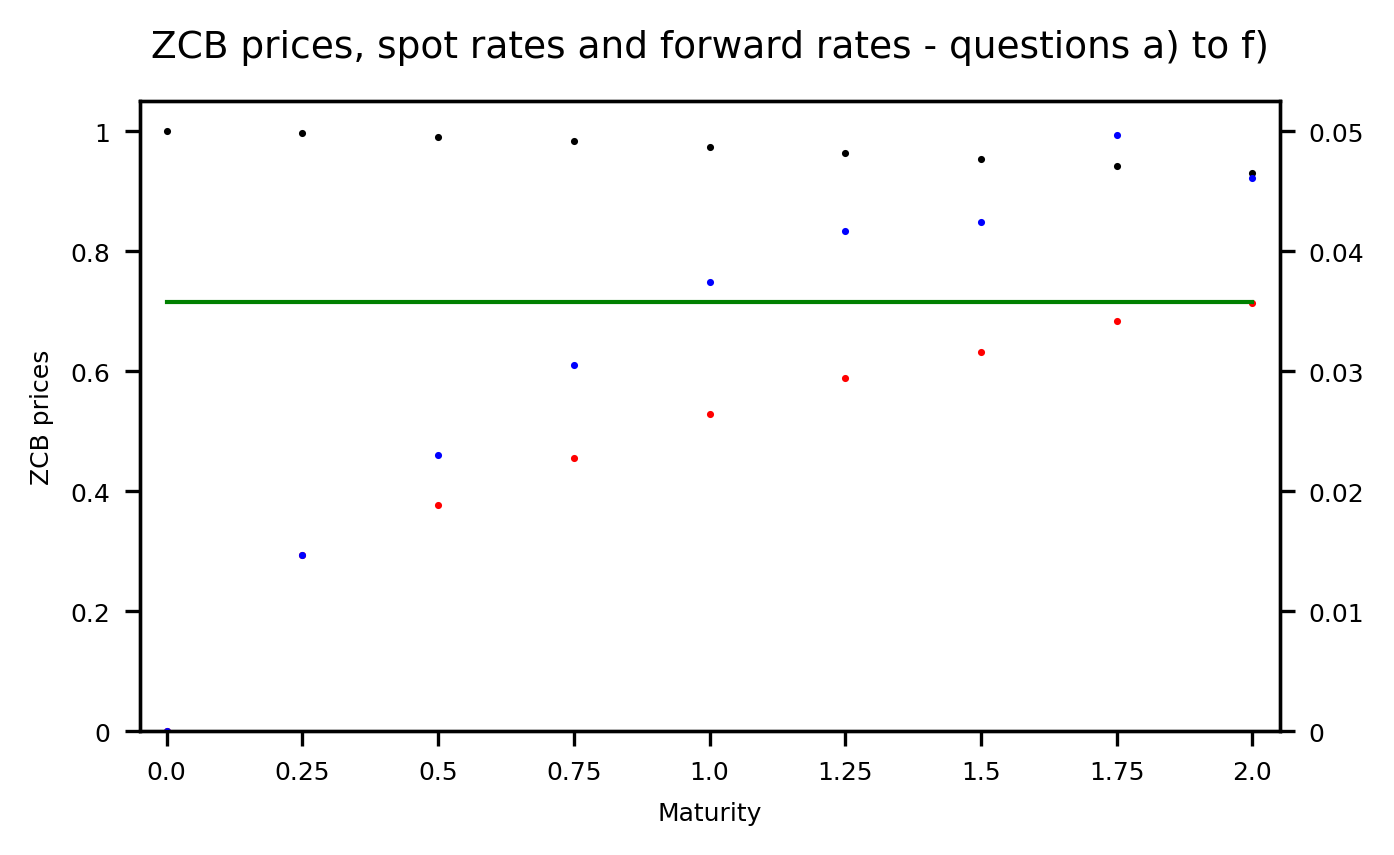

In [7]:
# Plotting the above
fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))   #
fig.suptitle(f"ZCB prices, spot rates and forward rates - questions a) to f)", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])

ax.set_xticks(T)
ax.set_xticklabels(T, fontsize = 6)
ax.set_xlim([T[0] - 0.05, T[-1] + 0.05])
plt.xlabel(f"Maturity", fontsize = 6)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize = 6)
ax.set_ylim([0, 1.05])
ax.set_ylabel(f"ZCB prices", fontsize = 6)
ax.scatter(T, p, s = 2, color = 'black', marker = ".")

ax1 = ax.twinx()
ax1.set_yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05])  # 6 tick locations
ax1.set_yticklabels([0, 0.01, 0.02, 0.03, 0.04, 0.05], fontsize = 6)  # 6 tick labels
ax1.set_ylim([0, 0.0525])
ax1.scatter(T, r, s = 2, color = 'red', linewidth = 1,  marker = ".") 
ax1.scatter(T, f_3M, s = 2, color = 'blue', linewidth = 1, marker = ".") 
ax1.plot(T, R * np.ones([M]), color='green', linewidth = 1, marker = "")



In [77]:
# Problem g)
# Define the cash flows for the swap
# C_swap represents the cash flows of both the floating and fixed legs of the swap over time
C_swap = np.array([0,-0.25*K*L_3M-K,0.5*R*K,0,0.5*R*K,0,0.5*R*K,0,0.5*R*K+K])



In [78]:
# Problem h)
# Initialize an array p_new with ones to store new bond prices for M periods
p_new = np.ones([M])

# Set the first three bond prices manually based on known values
p_new[0], p_new[1], p_new[2] = 1, p_0_2M_new, p_0_5M_new

# Append the new swap cash flows (C_swap) to the matrix of cash flows (C_new)
C_new = np.vstack([C_new, C_swap])

# Combine the known present values (pi_new and pi_swap_new) ensuring compatible shapes
# Make sure that pi_new and C_new have compatible dimensions
y = np.hstack([pi_new, [pi_swap_new]]) - p_new[1] * C_new[:, 1] - p_new[2] * C_new[:, 2]

# Extract the remaining cash flow coefficients (from column 3 onward) to solve for bond prices for later periods
x = C_new[:, 3:]

# Ensure that the dimensions of x and y match when solving the linear system
p_new[3:] = np.linalg.solve(np.matmul(np.transpose(x), x), np.matmul(np.transpose(x), y))

# Initialize arrays to store new spot rates (r_new) and 3-month forward rates (f_3M_new)
r_new, f_3M_new = np.zeros([M]), np.zeros([M])

# Set the first forward rate to NaN (not applicable)
f_3M_new[0] = np.nan

# Loop through the remaining periods to calculate the spot rates and forward rates
for i in range(1, M):
    r_new[i] = -np.log(p_new[i]) / T_new[i]
    f_3M_new[i] = -(np.log(p_new[i]) - np.log(p_new[i-1])) / (T_new[i] - T_new[i-1])


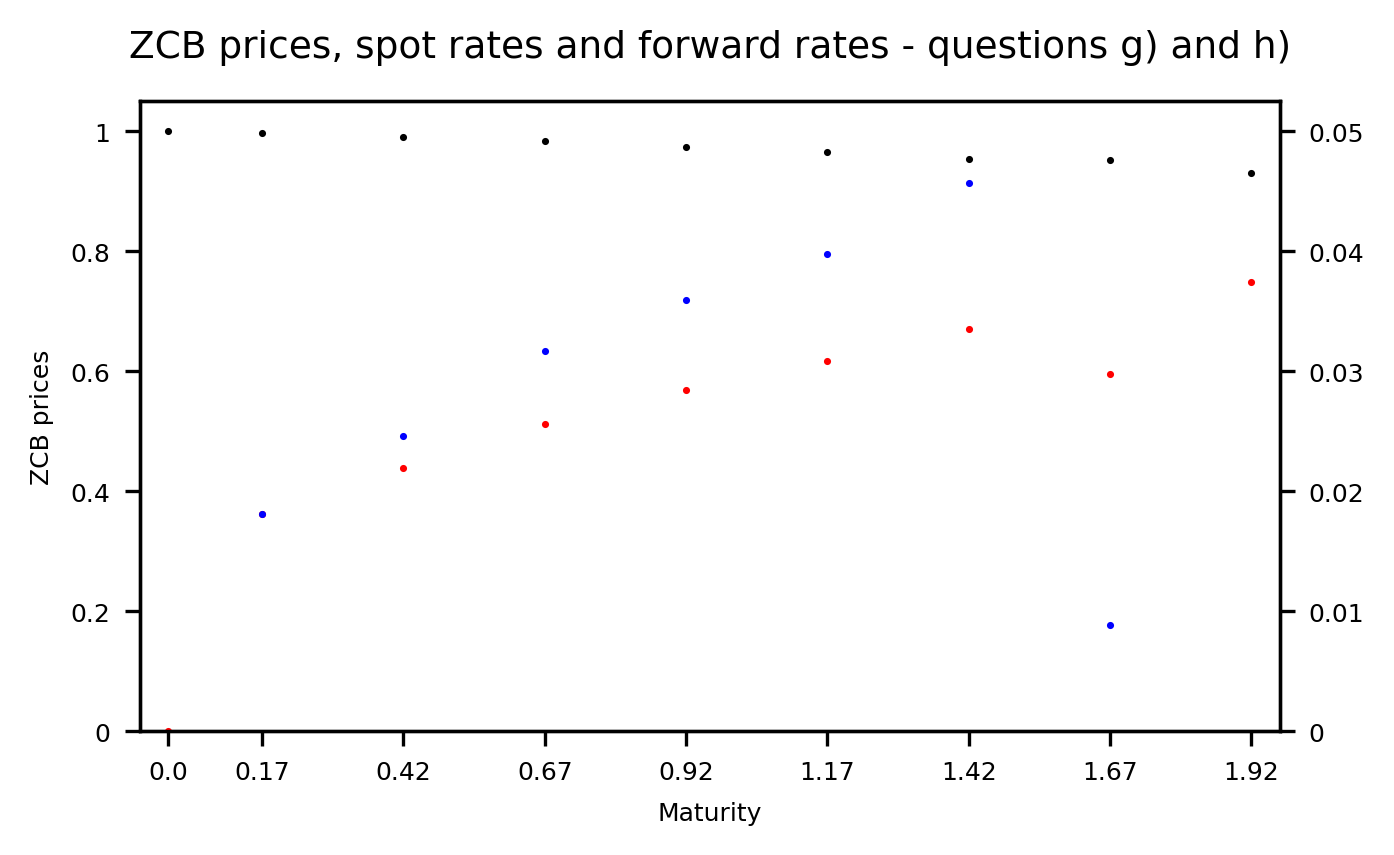

In [79]:
# Plot for quextions g) - h)
fig2 = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))   #
fig2.suptitle(f"ZCB prices, spot rates and forward rates - questions g) and h)", fontsize = 9)
gs = fig2.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig2.add_subplot(gs[0,0])

xtick_labels = [round(T_new[i],2) for i in range(0,M)]
ax.set_xticks(T_new)
ax.set_xticklabels(xtick_labels,fontsize = 6)
ax.set_xlim([T_new[0]-0.05,T_new[-1]+0.05])
plt.xlabel(f"Maturity",fontsize = 6)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([0,0.2,0.4,0.6,0.8,1],fontsize = 6)
ax.set_ylim([0,1.05])
ax.set_ylabel(f"ZCB prices",fontsize = 6)
ax.scatter(T_new, p_new, s = 2, color = 'black', marker = ".")

ax1 = ax.twinx()
ax1.set_yticks([0,0.01,0.02,0.03,0.04,0.05])
ax1.set_yticklabels([0,0.01,0.02,0.03,0.04,0.05],fontsize = 6)
ax1.set_ylim([0,0.0525])
ax1.scatter(T_new, r_new, s = 2, color = 'red', marker = ".")
ax1.scatter(T_new, f_3M_new, s = 2, color = 'blue', marker = ".")

plt.show()

In [81]:
# Problem i) 
# Check if zero-coupon bond prices are arbitrage-free
def check_zcb_arbitrage(p_new, T_new):
    for i in range(1, len(p_new)):
        if p_new[i] >= p_new[i-1]:
            print(f"Arbitrage detected between {T_new[i-1]} and {T_new[i]}")
        else:
            print(f"No arbitrage between {T_new[i-1]} and {T_new[i]}")

# Check if forward rates are consistent with spot rates
def check_forward_arbitrage(r_new, f_3M_new, T_new):
    for i in range(2, len(T_new)):
        implied_fwd_rate = (r_new[i] * T_new[i] - r_new[i-1] * T_new[i-1]) / (T_new[i] - T_new[i-1])
        if not np.isclose(implied_fwd_rate, f_3M_new[i], atol=1e-4):
            print(f"Forward rate arbitrage detected at {T_new[i]} (Implied: {implied_fwd_rate}, Actual: {f_3M_new[i]})")
        else:
            print(f"No arbitrage in forward rates at {T_new[i]}")

# Arbitrage check for zero-coupon bonds
check_zcb_arbitrage(p_new, T_new)

# Arbitrage check for forward rates
check_forward_arbitrage(r_new, f_3M_new, T_new)


No arbitrage between 0.0 and 0.16666666666666669
No arbitrage between 0.16666666666666669 and 0.4166666666666667
No arbitrage between 0.4166666666666667 and 0.6666666666666666
No arbitrage between 0.6666666666666666 and 0.9166666666666666
No arbitrage between 0.9166666666666666 and 1.1666666666666667
No arbitrage between 1.1666666666666667 and 1.4166666666666667
No arbitrage between 1.4166666666666667 and 1.6666666666666667
No arbitrage between 1.6666666666666667 and 1.9166666666666667
No arbitrage in forward rates at 0.4166666666666667
No arbitrage in forward rates at 0.6666666666666666
No arbitrage in forward rates at 0.9166666666666666
No arbitrage in forward rates at 1.1666666666666667
No arbitrage in forward rates at 1.4166666666666667
No arbitrage in forward rates at 1.6666666666666667
No arbitrage in forward rates at 1.9166666666666667


In [80]:
#Problem j)

# Market data for bond prices (pi) and swap price (pi_swap_new)
pi_market = np.array([0.99391543, 0.98379379, 100.00015573, 100.95055325, 
                      100.77535024, 100.26763545, 100.48419302, 96.56064083])
# Add the swap price as the last element of the market data
pi_market = np.append(pi_market, -2.04869321)  # Include receiver swap price

# Cash flow matrix (C)
# C includes the cash flows of the bonds and the swap
C = np.zeros([len(pi_market), 9])  # Adjust dimensions for 9 periods
# Fill in your cash flows as per the problem setup (you already have C defined earlier)
# C should include the cash flows for each bond and the swap, as you've done in the previous code

# Use OLS to estimate zero-coupon bond prices
# OLS solution: p_hat = (C^T * C)^(-1) * C^T * pi_market
p_hat = np.linalg.solve(np.matmul(np.transpose(C), C), np.matmul(np.transpose(C), pi_market))

# Display the estimated zero-coupon bond prices
print("Estimated Zero-Coupon Bond Prices:")
print(p_hat)

LinAlgError: Singular matrix